In [1]:
!wget https://data.smartdublin.ie/dataset/30e51aa9-a0ff-4dde-8341-fbb729a97308/resource/ea1329fd-b49f-4f39-bd31-5d2718864d35/download/henry-st-2015.csv -O henry.csv

--2018-12-22 21:04:10--  https://data.smartdublin.ie/dataset/30e51aa9-a0ff-4dde-8341-fbb729a97308/resource/ea1329fd-b49f-4f39-bd31-5d2718864d35/download/henry-st-2015.csv
Resolving data.smartdublin.ie (data.smartdublin.ie)... 172.104.131.250
Connecting to data.smartdublin.ie (data.smartdublin.ie)|172.104.131.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10911 (11K) [text/csv]
Saving to: ‘henry.csv’

henry.csv           100%[===================>]  10.66K  --.-KB/s    in 0s      

2018-12-22 21:04:10 (49.8 MB/s) - ‘henry.csv’ saved [10911/10911]



In [46]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib as mpl

In [180]:
df = pd.read_csv("henry.csv", index_col=0, parse_dates=True)

In [181]:
#df.index = df.index.to_period("M")

In [182]:
df.reset_index(inplace=True)
df.head(3)

,Date,Henry_Street,IN,OUT
0,2015-01-01,19321.0,9520.0,9801.0
1,2015-02-01,48178.0,23862.0,24316.0
2,2015-03-01,35378.0,17613.0,17765.0


In [183]:
import matplotlib.pyplot as plt

In [184]:
df["MOORE"] = abs(-df["IN"] + df["OUT"])

In [185]:
df.reset_index(inplace=True, drop=True)

In [186]:
df.head(3)

,Date,Henry_Street,IN,OUT,MOORE
0,2015-01-01,19321.0,9520.0,9801.0,281.0
1,2015-02-01,48178.0,23862.0,24316.0,454.0
2,2015-03-01,35378.0,17613.0,17765.0,152.0


In [179]:
pd.to_datetime(df["Date"])

TypeError: <class 'pandas._libs.tslibs.period.Period'> is not convertible to datetime

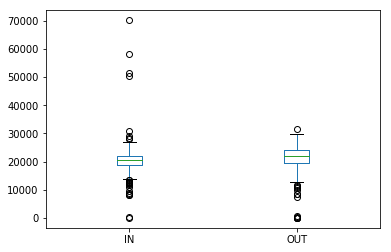

In [187]:
df.iloc[:,2:4].plot(kind='box')

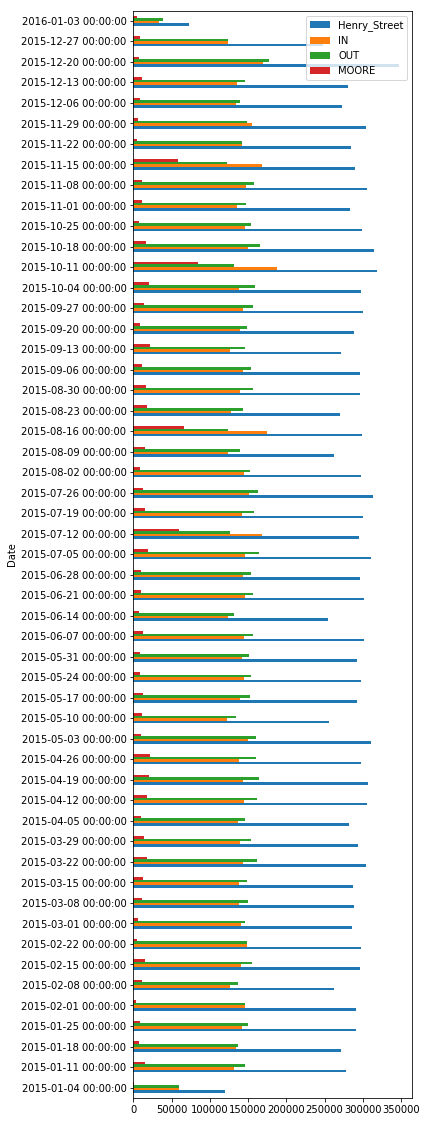

In [188]:
df_group_month = df.groupby(pd.Grouper(key="Date", freq="1W")).sum()

In [250]:
w_no = [d.isocalendar()[1] for d in pd.to_datetime(df_group_month.index)][::-1][1:]

In [251]:
w_no

[52,
 51,
 50,
 49,
 48,
 47,
 46,
 45,
 44,
 43,
 42,
 41,
 40,
 39,
 38,
 37,
 36,
 35,
 34,
 33,
 32,
 31,
 30,
 29,
 28,
 27,
 26,
 25,
 24,
 23,
 22,
 21,
 20,
 19,
 18,
 17,
 16,
 15,
 14,
 13,
 12,
 11,
 10,
 9,
 8,
 7,
 6,
 5,
 4,
 3,
 2,
 1]

In [213]:
df_group_month.head(1)

,Henry_Street,IN,OUT,MOORE
Date,,,,
2015-01-04,119405.0,59791.0,59614.0,1257.0


In [244]:
len(df_group_month[["MOORE"]].iloc[:-1,:])

52

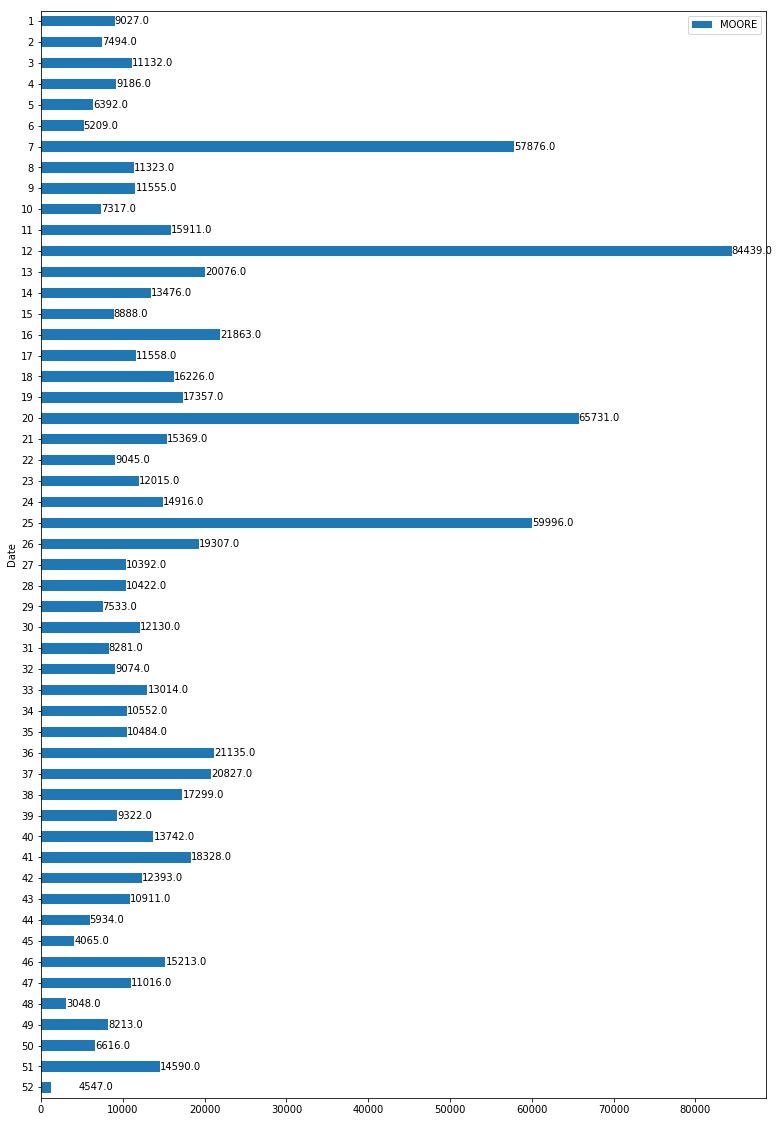

In [261]:
ax = df_group_month[["MOORE"]].iloc[:-1,:].plot(kind="barh", stacked=False, figsize=(13, 20))
_ = ax.set_yticklabels(w_no)
for i in range(1, 53):
    if i==52:
        _ = ax.text(df_group_month.iloc[i, 3], 0, df_group_month.iloc[i, 3], verticalalignment="center")
    else:
        _ = ax.text(df_group_month.iloc[i, 3], i, df_group_month.iloc[i, 3], verticalalignment="center")
    #print(str(df_group_month.iloc[53-i, 3]))

In [ ]:
sns.

In [5]:
import datetime

In [22]:
week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [44]:
week[datetime.datetime(2015, 1, 1).weekday()]

'Thursday'

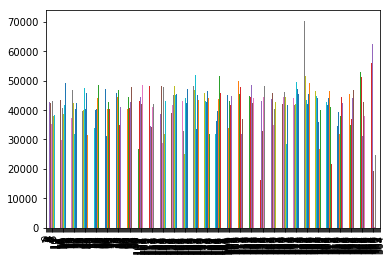

In [49]:
df["Henry_Street"].plot(kind='bar')
